# **1. Import Library**

In [8]:
# Import library untuk visualisasi data dan manipulasi data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk Klasifikasi
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# **2. Memuat Dataset dari Hasil Clustering**

In [2]:
# Membaca dataset CSV hasil clustering menggunakan library pandas
df = pd.read_csv('hasil_clustering.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Scaled,AccountBalance_Scaled,TransactionFrequency,Cluster_KMeans,Distance,Potential_Fraud,KMeans_Fraud
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,1,San Diego,D000380,162.198.218.92,M015,ATM,...,1,5112.21,2024-11-04 08:08:08,-0.971275,-0.000537,7,0,25.889862,False,Not Fraud
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,1,Houston,D000051,13.149.61.4,M052,ATM,...,1,13758.91,2024-11-04 08:09:35,0.269440,2.216472,7,2,2.476078,False,Not Fraud
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,1,Mesa,D000235,215.97.143.157,M009,Online,...,1,1122.35,2024-11-04 08:07:04,-0.586882,-1.023534,4,0,2.582010,False,Not Fraud
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,1,Raleigh,D000187,200.13.225.150,M002,Online,...,1,8569.06,2024-11-04 08:09:06,-0.387456,0.885797,8,0,30.214980,False,Not Fraud
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,0,Atlanta,D000308,65.164.3.100,M091,Online,...,1,7429.40,2024-11-04 08:06:39,-0.973468,0.593589,6,1,48.912178,True,Fraud


Dataset tidak mengandung missing value, nilai duplikat, invalid value berdasarkan EDA di project clustering sebelumnya. Sehingga data sudah cukup bersih untuk diolah

# **3. Data Splitting**

In [3]:
data_for_ml = df[['TransactionAmount_Scaled', 'AccountBalance_Scaled', 'TransactionDuration',
                 'LoginAttempts', 'TransactionFrequency', 'Cluster_KMeans']]

data_for_ml.head()

,TransactionAmount_Scaled,AccountBalance_Scaled,TransactionDuration,LoginAttempts,TransactionFrequency,Cluster_KMeans
0,-0.971275,-0.000537,81,1,7,0
1,0.269440,2.216472,141,1,7,2
2,-0.586882,-1.023534,56,1,4,0
3,-0.387456,0.885797,25,1,8,0
4,-0.973468,0.593589,198,1,6,1


In [4]:
X = data_for_ml.drop(columns=['Cluster_KMeans'])
y = data_for_ml['Cluster_KMeans'] #Label hasil clustering

print('Jumlah baris dan kolom data fitur: ', X.shape)
print('Jumlah baris dan kolom data target: ', y.shape)

Jumlah baris dan kolom data fitur:  (2512, 5)
Jumlah baris dan kolom data target:  (2512,)


In [5]:
# Memisahkan dataset menjadi dua bagian, yaitu training dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 672)

print('Jumlah baris dan kolom data latih (fitur): ', X_train.shape)
print('Jumlah baris dan kolom data latih (target): ', y_train.shape)
print('Jumlah baris dan kolom data uji (fitur): ', X_test.shape)
print('Jumlah baris dan kolom data uji (fitur): ', y_test.shape)

Jumlah baris dan kolom data latih (fitur):  (1758, 5)
Jumlah baris dan kolom data latih (target):  (1758,)
Jumlah baris dan kolom data uji (fitur):  (754, 5)
Jumlah baris dan kolom data uji (fitur):  (754,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

### **1. Random Forest**

In [6]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

### **2. Logistic Regression**

In [24]:
log = LogisticRegression(max_iter = 500)
log.fit(X_train,y_train)

LogisticRegression(max_iter=500)

Random Forest dipilih karena merupakan algoritma ensemble learning yang menggabungkan beberapa Decision Tree untuk meningkatkan akurasi prediksi. Logistic Regression dipilih karena cocok untuk klasifikasi biner

## **b. Evaluasi Model Klasifikasi**

### **1. Evaluasi Random Forest**

In [18]:
# Membuat prediksi menggunakan data uji
y_pred_rf = rf.predict(X_test)

# Menghitung training accuracy, testing accuracy, dan accuracy score
train_acc_rf = rf.score(X_train, y_train)
test_acc_rf = rf.score(X_test, y_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Menghitung precision, recall, dan f1 score
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

In [22]:
eval_rf = {'Model':['Random Forest'],
              'Training Accuracy':train_acc_rf, 'Testing Accuracy':test_acc_rf,
              'Accuracy Score':acc_rf, 'Precision Score':precision_rf, 'Recall Score':recall_rf, 'F1 Score':f1_rf}

print("Tabel Evaluasi Model Random Forest:")
eval_rf = pd.DataFrame(eval_rf)
eval_rf

Tabel Evaluasi Model Random Forest:


,Model,Training Accuracy,Testing Accuracy,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Random Forest,1.0,1.0,1.0,1.0,1.0,1.0


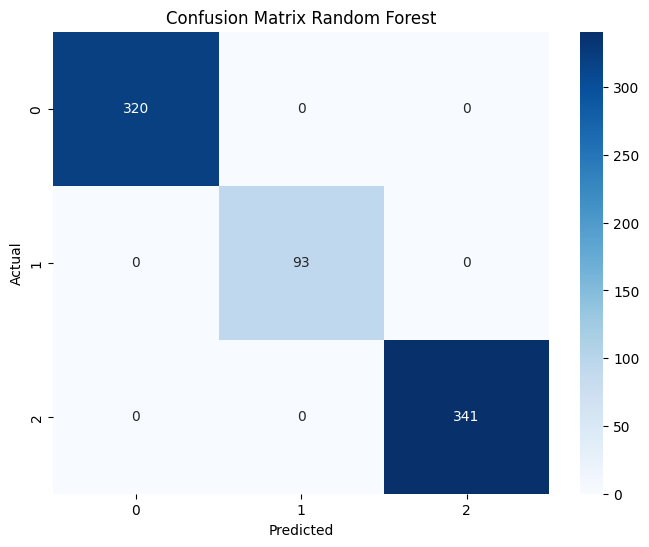

In [17]:
# Confusion Matrix Random Forest
mat_rf = confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(mat_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **2. Evaluasi Logistic Regression**

In [25]:
y_pred_log = log.predict(X_test)

# Menghitung training accuracy, testing accuracy, dan accuracy score
train_acc_log = log.score(X_train, y_train)
test_acc_log = log.score(X_test, y_test)
acc_log = accuracy_score(y_test, y_pred_log)

# Menghitung precision, recall, dan f1 score
precision_log = precision_score(y_test, y_pred_log, average='weighted')
recall_log = recall_score(y_test, y_pred_log, average='weighted')
f1_log = f1_score(y_test, y_pred_log, average='weighted')

In [26]:
eval_log = {'Model':['Logistic Regression'],
              'Training Accuracy':train_acc_log, 'Testing Accuracy':test_acc_log,
              'Accuracy Score':acc_log, 'Precision Score':precision_log, 'Recall Score':recall_log, 'F1 Score':f1_log}

print("Tabel Evaluasi Model Logistic Regression:")
eval_log = pd.DataFrame(eval_log)
eval_log

Tabel Evaluasi Model Logistic Regression:


,Model,Training Accuracy,Testing Accuracy,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Logistic Regression,1.0,0.998674,0.998674,0.998678,0.998674,0.998671


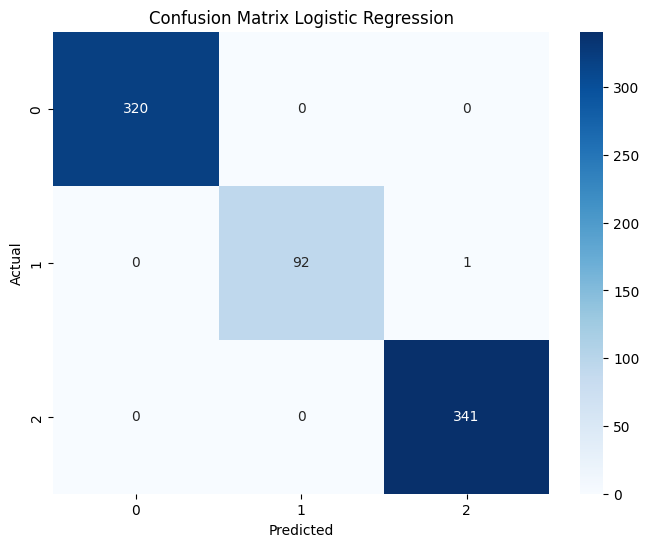

In [27]:
# Confusion Matrix Logistic Regression
mat_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(mat_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Hasil evaluasi model keseluruhan menunjukkan:
1. **Random Forest**
  * Accuracy Score: 1.0
  * F1 Score: 1.0

2. **Logistic Regression**
  * Accuracy Score: 0.998674
  * F1 Score:	0.998671


Model memiliki nilai precision dan recall yang baik dan cukup seimbang. F1 score yang didapat >92%

Tidak ada indikasi overfitting maupun underfitting. Kedua model berjalan baik saat training dan testing. Tidak ada kelemahan model yang signifikan, sehingga model bisa digunakan untuk prediksi.